In [33]:
import os
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Fixing the path:
if os.getcwd()[-1] in '0123456798':
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)

In [39]:
tokens_df = pd.read_csv('BigData/top_community_tokens.csv', usecols=["Tokens", "Communities"], converters={"Communities": literal_eval, 'Tokens': literal_eval})

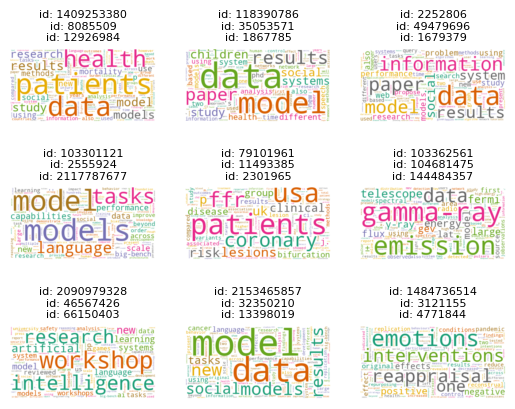

In [41]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3)
for i, ax in enumerate(axs.flat):
    # Generate a word cloud from the token frequencies
    wordcloud = WordCloud(background_color="white", colormap="Dark2").generate_from_frequencies(tokens_df["Tokens"][i])
    
    # Display the word cloud in the subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    name_list = list(tokens_df["Communities"][i])[:3]
    ax.set_title(f"id: {name_list[0]}\nid: {name_list[1]}\nid: {name_list[2]}", fontsize = 8)
    ax.axis("off")

# Adjust the spacing between subplots and add a title to the figure
fig.subplots_adjust(hspace=.5)
# fig.subplots_adjust(wspace=)
plt.show()

### Comment on your results

Well, based on the shortcomings of the TF-IDF method I chose to just use the TF to make the word clouds, and I think these results are satisfying. They are somewhat telling of what types of fields the groups are related to. The one about "gamma-ray" and "emission" is most likely astronomy etc.

### Look up the top authors in each community



In [46]:
import requests

author_list = list(tokens_df["Communities"][0])[:3]

BASE_URL = "https://api.semanticscholar.org/graph/"
VERSION = "v1/"
RESOURCE = "author/search"
my_url = BASE_URL + VERSION + RESOURCE

print(author_list)
for author in author_list:
    params = {'query':author,
            "offset":0,
            "limit":1,
                "fields": "authorId,,authorName"}

    r = requests.get(my_url, params=params)
    print(r.json())

[1409253380, 8085509, 12926984]
{'total': 0, 'offset': 0, 'data': []}
{'total': 0, 'offset': 0, 'data': []}
{'total': 0, 'offset': 0, 'data': []}
